In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached charset_normalizer-3.0.1-cp38-cp38-win_amd64.whl (95 kB)
  Using cached clang-5.0.tar.gz (30 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached entrypoints-0.4-py3-none-any.whl (5.3 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_auth-2.16.0-py2.py3-none-any.whl (177 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using 

In [89]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [90]:
train_path, test_path = "./Train", "./Test/"
data_dir_train, data_dir_test = pathlib.Path(train_path), pathlib.Path(test_path)

In [91]:
batch_size = 32
img_height = 60
img_width = 60

In [92]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [93]:
class_names = train_ds.class_names
class_names


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

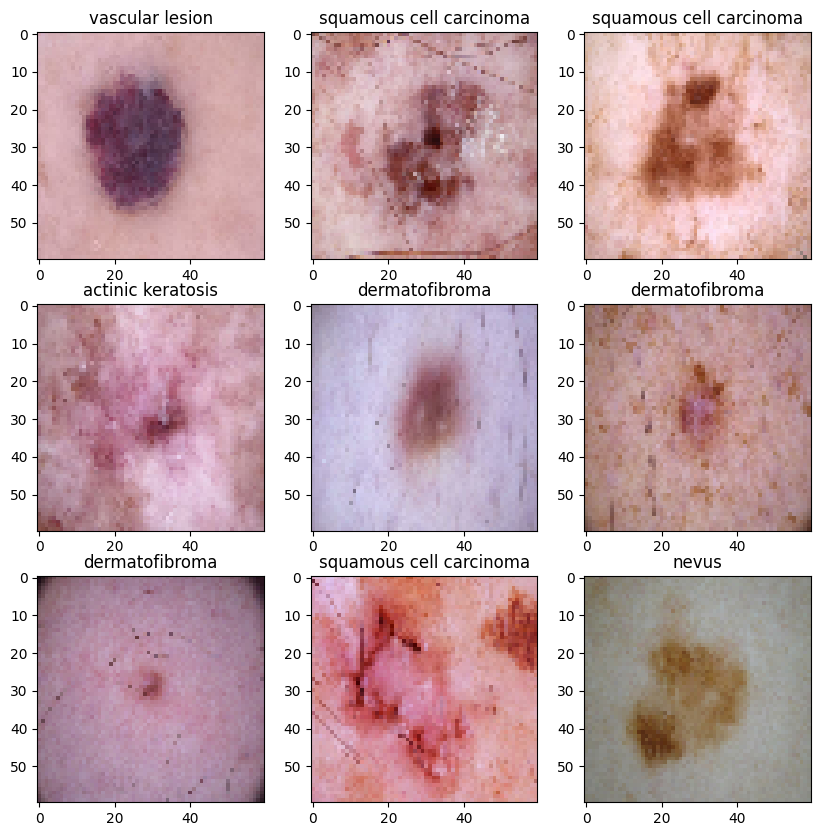

In [94]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    lable_index = np.argmax(labels[i].numpy().astype("int"))
    plt.title(class_names[lable_index])
    # plt.axis("off")

In [95]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [96]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [97]:
input_shape = (img_height, img_width, 3)

In [98]:
for i in class_names:
    directory =train_path+'/'+i+'/'
    class_directory = pathlib.Path(directory)
    sample_count=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {sample_count} images.')

actinic keratosis has 114 images.
basal cell carcinoma has 376 images.
dermatofibroma has 95 images.
melanoma has 438 images.
nevus has 357 images.
pigmented benign keratosis has 462 images.
seborrheic keratosis has 77 images.
squamous cell carcinoma has 181 images.
vascular lesion has 139 images.


In [99]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

In [100]:
model_1=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [101]:
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [102]:
epochs = 30
history = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
281/281 [==============================] - 68s 187ms/step - loss: 2.1921 - accuracy: 0.1303 - val_loss: 2.1916 - val_accuracy: 0.1331
Epoch 2/30
281/281 [==============================] - 49s 176ms/step - loss: 2.1255 - accuracy: 0.1620 - val_loss: 2.0803 - val_accuracy: 0.1972
Epoch 3/30
281/281 [==============================] - 50s 177ms/step - loss: 1.8741 - accuracy: 0.2443 - val_loss: 2.1916 - val_accuracy: 0.1460
Epoch 4/30
281/281 [==============================] - 50s 177ms/step - loss: 1.7912 - accuracy: 0.2790 - val_loss: 1.8870 - val_accuracy: 0.2692
Epoch 5/30
281/281 [==============================] - 50s 177ms/step - loss: 1.7642 - accuracy: 0.2938 - val_loss: 2.1765 - val_accuracy: 0.1531
Epoch 6/30
281/281 [==============================] - 50s 176ms/step - loss: 1.7139 - accuracy: 0.3208 - val_loss: 1.9904 - val_accuracy: 0.2425
Epoch 7/30
281/281 [==============================] - 49s 174ms/step - loss: 1.6656 - accuracy: 0.3479 - val_loss: 2.2543 - val_ac

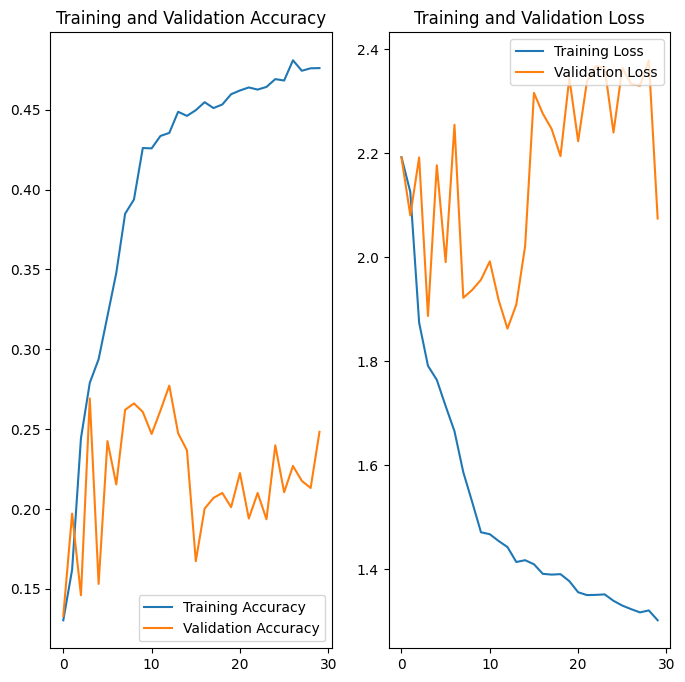

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [104]:
import Augmentor

In [105]:
for i in class_names:
    p = Augmentor.Pipeline(train_path+ '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

Initialised with 114 image(s) found.
Output directory set to ./Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21A0583E860>: 100%|██████████| 1000/1000 [00:05<00:00, 186.12 Samples/s]                 


Initialised with 376 image(s) found.
Output directory set to ./Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21A0180B198>: 100%|██████████| 1000/1000 [00:04<00:00, 205.35 Samples/s]                 


Initialised with 95 image(s) found.
Output directory set to ./Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x21A0082B780>: 100%|██████████| 1000/1000 [00:05<00:00, 182.85 Samples/s]


Initialised with 438 image(s) found.
Output directory set to ./Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x21983C3A8D0>: 100%|██████████| 1000/1000 [00:24<00:00, 41.01 Samples/s]                  


Initialised with 357 image(s) found.
Output directory set to ./Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1019x717 at 0x2198BBE5518>: 100%|██████████| 1000/1000 [00:21<00:00, 45.99 Samples/s] 


Initialised with 462 image(s) found.
Output directory set to ./Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x219F38A9278>: 100%|██████████| 1000/1000 [00:05<00:00, 194.12 Samples/s]


Initialised with 77 image(s) found.
Output directory set to ./Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2198D846668>: 100%|██████████| 1000/1000 [00:11<00:00, 90.60 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to ./Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2198DAF2F28>: 100%|██████████| 1000/1000 [00:04<00:00, 200.86 Samples/s]                 


Initialised with 139 image(s) found.
Output directory set to ./Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2198B907C18>: 100%|██████████| 1000/1000 [00:05<00:00, 194.34 Samples/s]                 


In [106]:
for i in class_names:
    directory =train_path+'/'+i+'/'
    directory_out =train_path+'/'+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} images')


actinic keratosis has 2114 images
basal cell carcinoma has 2376 images
dermatofibroma has 2095 images
melanoma has 2438 images
nevus has 2357 images
pigmented benign keratosis has 2462 images
seborrheic keratosis has 2077 images
squamous cell carcinoma has 2181 images
vascular lesion has 2139 images


In [107]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20239 files belonging to 9 classes.
Using 16192 files for training.


In [108]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20239 files belonging to 9 classes.
Using 4047 files for validation.


In [109]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'Same'),
    MaxPooling2D(pool_size=(2,2)),

    Dropout(0.5),   
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),   
    Dense(9, activation='softmax')
])

In [110]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [111]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
506/506 [==============================] - 123s 241ms/step - loss: 1.9081 - accuracy: 0.2443 - val_loss: 1.5434 - val_accuracy: 0.3828
Epoch 2/30
506/506 [==============================] - 117s 231ms/step - loss: 1.4496 - accuracy: 0.4285 - val_loss: 1.2234 - val_accuracy: 0.5335
Epoch 3/30
506/506 [==============================] - 117s 231ms/step - loss: 1.2808 - accuracy: 0.5043 - val_loss: 1.0467 - val_accuracy: 0.6049
Epoch 4/30
506/506 [==============================] - 114s 224ms/step - loss: 1.1203 - accuracy: 0.5708 - val_loss: 0.9442 - val_accuracy: 0.6578
Epoch 5/30
506/506 [==============================] - 114s 224ms/step - loss: 0.9944 - accuracy: 0.6243 - val_loss: 0.8412 - val_accuracy: 0.6995
Epoch 6/30
506/506 [==============================] - 117s 231ms/step - loss: 0.8551 - accuracy: 0.6793 - val_loss: 0.6113 - val_accuracy: 0.7714
Epoch 7/30
506/506 [==============================] - 119s 235ms/step - loss: 0.7604 - accuracy: 0.7176 - val_loss: 0.5184 -

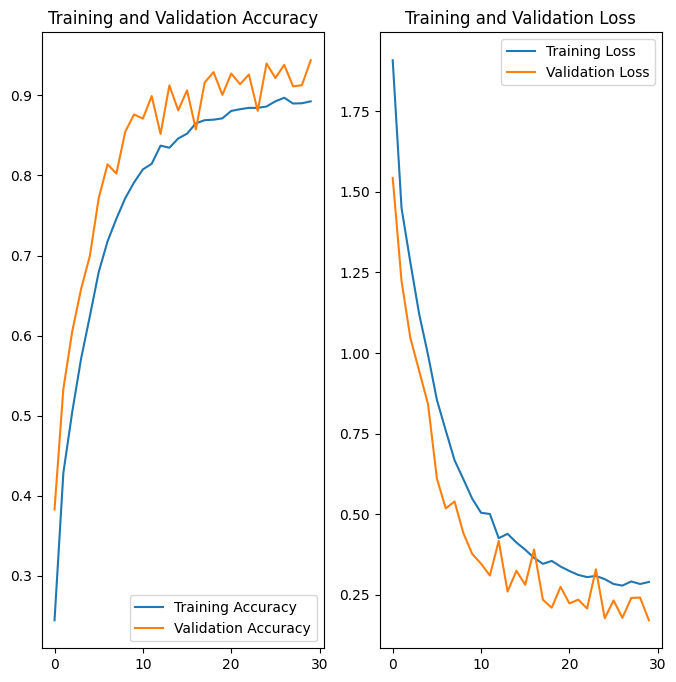

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()